In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Loading data

In [2]:
data_df = pd.read_csv('outputs/full_iris_training_results.csv')

In [3]:
grouped_data = data_df.groupby(['encoding_type','epoch']).mean()

___

## Iris Training results

Here we aggregate the results from the Iris training, combined in 'training_results.csv' to generate Fig. 4(a) and 4(b)

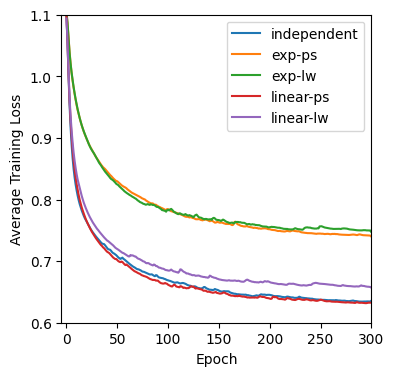

In [4]:
fig, ax = plt.subplots(figsize=(4,4))

x_key = 'epoch'
y_key = 'train_loss'

sns.lineplot(data=grouped_data.loc['independent'], x=x_key, y=y_key, label='independent')
sns.lineplot(data=grouped_data.loc['exponential_ps'], x=x_key, y=y_key, label='exp-ps')
sns.lineplot(data=grouped_data.loc['exponential_lw'], x=x_key, y=y_key, label='exp-lw')
sns.lineplot(data=grouped_data.loc['linear_ps'], x=x_key, y=y_key, label='linear-ps')
sns.lineplot(data=grouped_data.loc['linear_lw'], x=x_key, y=y_key, label='linear-lw')

plt.xlim(-5,300)
plt.ylim(0.6,1.1)
plt.ylabel('Average Training Loss')
plt.xlabel('Epoch');

In [5]:
agg_keys = {"test_acc": ["max", "std", "mean"]}

stats = data_df[data_df.encoding_type=='independent'].agg(agg_keys)

independent_mean = stats['test_acc']['mean']
independent_std = stats['test_acc']['std']
max_independent = stats['test_acc']['max']

#lw: (length,length), (width,width) [0,1,2,3]
stats = data_df[data_df.encoding_type=='linear_lw'].agg(agg_keys)

linear_lw_mean = stats['test_acc']['mean']
linear_lw_std = stats['test_acc']['std']
max_linear_lw = stats['test_acc']['max']

#ps: (petal, petal), (sepal, sepal) [0,2,1,3]
stats = data_df[data_df.encoding_type=='linear_ps'].agg(agg_keys)

linear_ps_mean = stats['test_acc']['mean']
linear_ps_std = stats['test_acc']['std']
max_linear_ps = stats['test_acc']['max']

#lw: (length,length), (width,width) [0,1,2,3]
stats = data_df[data_df.encoding_type=='exponential_lw'].agg(agg_keys)

exponential_lw_mean = stats['test_acc']['mean']
exponential_lw_std = stats['test_acc']['std']
max_exponential_lw = stats['test_acc']['max']

#ps: (petal, petal), (sepal, sepal) [0,2,1,3]
stats = data_df[data_df.encoding_type=='exponential_ps'].agg(agg_keys)

exponential_ps_mean = stats['test_acc']['mean']
exponential_ps_std = stats['test_acc']['std']
max_exponential_ps = stats['test_acc']['max']


palette = plt.get_cmap('tab20').colors
colors = [palette[2], palette[0], palette[1], palette[4], palette[14]]

techniques = [
    'Exponential_LW',
    'Exponential_PS',
    'Linear_LW',
    'Linear_PS',
    'Independent'
    ]

x_pos = np.arange(len(techniques))

maxes = np.array([max_exponential_lw, max_exponential_ps, max_linear_lw, max_linear_ps,max_independent])
means = np.array([exponential_lw_mean, exponential_ps_mean, linear_lw_mean, linear_ps_mean, independent_mean])
error = np.array([exponential_lw_std, exponential_ps_std, linear_lw_std, linear_ps_std, independent_std])

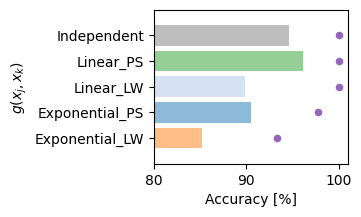

In [6]:
fig, ax = plt.subplots(figsize=(2.5,2))

ax.barh(
    x_pos,
    100*means,
    align='center',
    alpha=0.5,
    color=colors,
    capsize=5
    ) 

plt.scatter(
    100*maxes,
    [0,1,2,3,4],
    color=palette[8],
    s=20,
    label='max accuracy'
    )

ax.set_xbound(80,101)
ax.set_ybound(-1,5)

ax.set_ylabel("$g(x_j, x_k)$")
ax.set_xlabel("Accuracy [%]")

ax.set_yticks(x_pos)
ax.set_yticklabels(techniques);

___

## Scatterplot for Iris features
Here we generate Fig.3(a)

In [7]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns

dataset = datasets.load_iris()

X_iris = dataset['data']
y_iris = dataset['target']

scaler = MinMaxScaler()

X_iris = scaler.fit_transform(X_iris)

iris_df = pd.DataFrame(X_iris, columns = dataset.feature_names)
iris_df['class'] = y_iris

for i in range(3):
    iris_df.loc[iris_df['class'] == i, 'class'] = dataset.target_names[i]

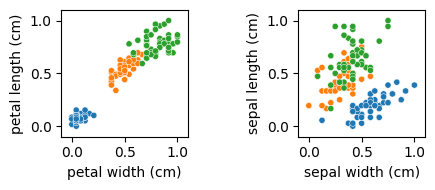

In [8]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(5,2))

sns.scatterplot(
    x='petal width (cm)',
    y='petal length (cm)',
    hue='class',
    data=iris_df,
    ax=ax1,
    s=20,
    legend=False
)
ax1.set_xlim(-0.1,1.1)
ax1.set_ylim(-0.1,1.1)
ax1.set_box_aspect(1)

sns.scatterplot(
    x='sepal width (cm)',
    y='sepal length (cm)',
    hue='class',
    data=iris_df,
    ax=ax2,
    s=20,
    legend=False
)

ax2.set_xlim(-0.1,1.1)
ax2.set_ylim(-0.1,1.1)
ax2.set_box_aspect(1)
plt.tight_layout()